In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import random

sys.path.append(os.path.abspath(".."))

from data.utils.preprocessor import DataPreprocessor

## Generate and Preprocess Data

In [2]:
DataPreprocessor = DataPreprocessor(start_date="2023-01-01 00:00:00", end_date="2024-09-30 23:00:00")

In [3]:
radiation_data = DataPreprocessor.generate_radiation()
radiation_data

,Radiation
Datetime,
2023-01-01 00:00:00,0.0
2023-01-01 01:00:00,0.0
2023-01-01 02:00:00,0.0
2023-01-01 03:00:00,0.0
2023-01-01 04:00:00,0.0
...,...
2024-09-30 19:00:00,0.0
2024-09-30 20:00:00,0.0
2024-09-30 21:00:00,0.0


In [4]:
temperature_data = DataPreprocessor.generate_temperature()
temperature_data

,Temperature
Datetime,
2023-01-01 00:00:00,17.2
2023-01-01 01:00:00,17.3
2023-01-01 02:00:00,17.4
2023-01-01 03:00:00,17.7
2023-01-01 04:00:00,17.7
...,...
2024-09-30 19:00:00,27.1
2024-09-30 20:00:00,27.5
2024-09-30 21:00:00,26.2


In [5]:
building_data = DataPreprocessor.generate_building_data()
building_data

,Energy
Datetime,
2023-01-01 00:00:00,8.69
2023-01-01 01:00:00,8.42
2023-01-01 02:00:00,8.33
2023-01-01 03:00:00,9.70
2023-01-01 04:00:00,10.42
...,...
2024-09-30 19:00:00,87.77
2024-09-30 20:00:00,78.45
2024-09-30 21:00:00,63.24


In [6]:
electricitycostG2B_data, electricitycostG2V_data = DataPreprocessor.generate_electricity_cost()
electricitycostG2B_data

,c_G2B_t
Datetime,
2023-01-01 00:00:00,1.85
2023-01-01 01:00:00,1.85
2023-01-01 02:00:00,1.85
2023-01-01 03:00:00,1.85
2023-01-01 04:00:00,1.85
...,...
2024-09-30 19:00:00,5.05
2024-09-30 20:00:00,5.05
2024-09-30 21:00:00,5.05


In [7]:
electricitycostG2V_data


,c_G2V_t
Datetime,
2023-01-01 00:00:00,1.95
2023-01-01 01:00:00,1.95
2023-01-01 02:00:00,1.95
2023-01-01 03:00:00,1.95
2023-01-01 04:00:00,1.95
...,...
2024-09-30 19:00:00,8.35
2024-09-30 20:00:00,8.35
2024-09-30 21:00:00,8.35


In [8]:
battery_series = DataPreprocessor.generate_battery_series(window_size = 30)
print(battery_series.shape)

battery_series = DataPreprocessor.generate_battery_series(window_size = 36)
print(battery_series.shape)

battery_series = DataPreprocessor.generate_battery_series(window_size = 48)
print(battery_series.shape)

(308, 31)
(235, 37)
(153, 49)


In [9]:
battery_schedule = DataPreprocessor.generate_battery_schedule(n_station=38*2, SOC_thr=0.9, window_size=30)
battery_schedule = DataPreprocessor.generate_battery_schedule(n_station=38*2, SOC_thr=0.9, window_size=36)
battery_schedule = DataPreprocessor.generate_battery_schedule(n_station=38*2, SOC_thr=0.9, window_size=48)
battery_schedule

,a_vt,SOC_a_v,SOC_d_v
0,"[[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.45, 0.4, 0.48, 0.43, 0.47, 0.41, 0.48, 0.44...","[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."
1,"[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.49, 0.5, 0.48, 0.43, 0.44, 0.47, 0.48, 0.48...","[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."
2,"[[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.41, 0.4, 0.48, 0.46, 0.41, 0.43, 0.45, 0.47...","[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."
3,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.46, 0.41, 0.44, 0.45, 0.4, 0.43, 0.44, 0.5,...","[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."
4,"[[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.41, 0.45, 0.46, 0.43, 0.46, 0.44, 0.4, 0.48...","[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."
...,...,...,...
148,"[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.45, 0.48, 0.48, 0.47, 0.49, 0.49, 0.44, 0.5...","[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."
149,"[[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.47, 0.44, 0.41, 0.41, 0.47, 0.43, 0.48, 0.4...","[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."
150,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.45, 0.43, 0.5, 0.47, 0.42, 0.46, 0.42, 0.45...","[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."
151,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0.48, 0.48, 0.49, 0.43, 0.41, 0.48, 0.4, 0.4,...","[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, ..."


#### Plot random week

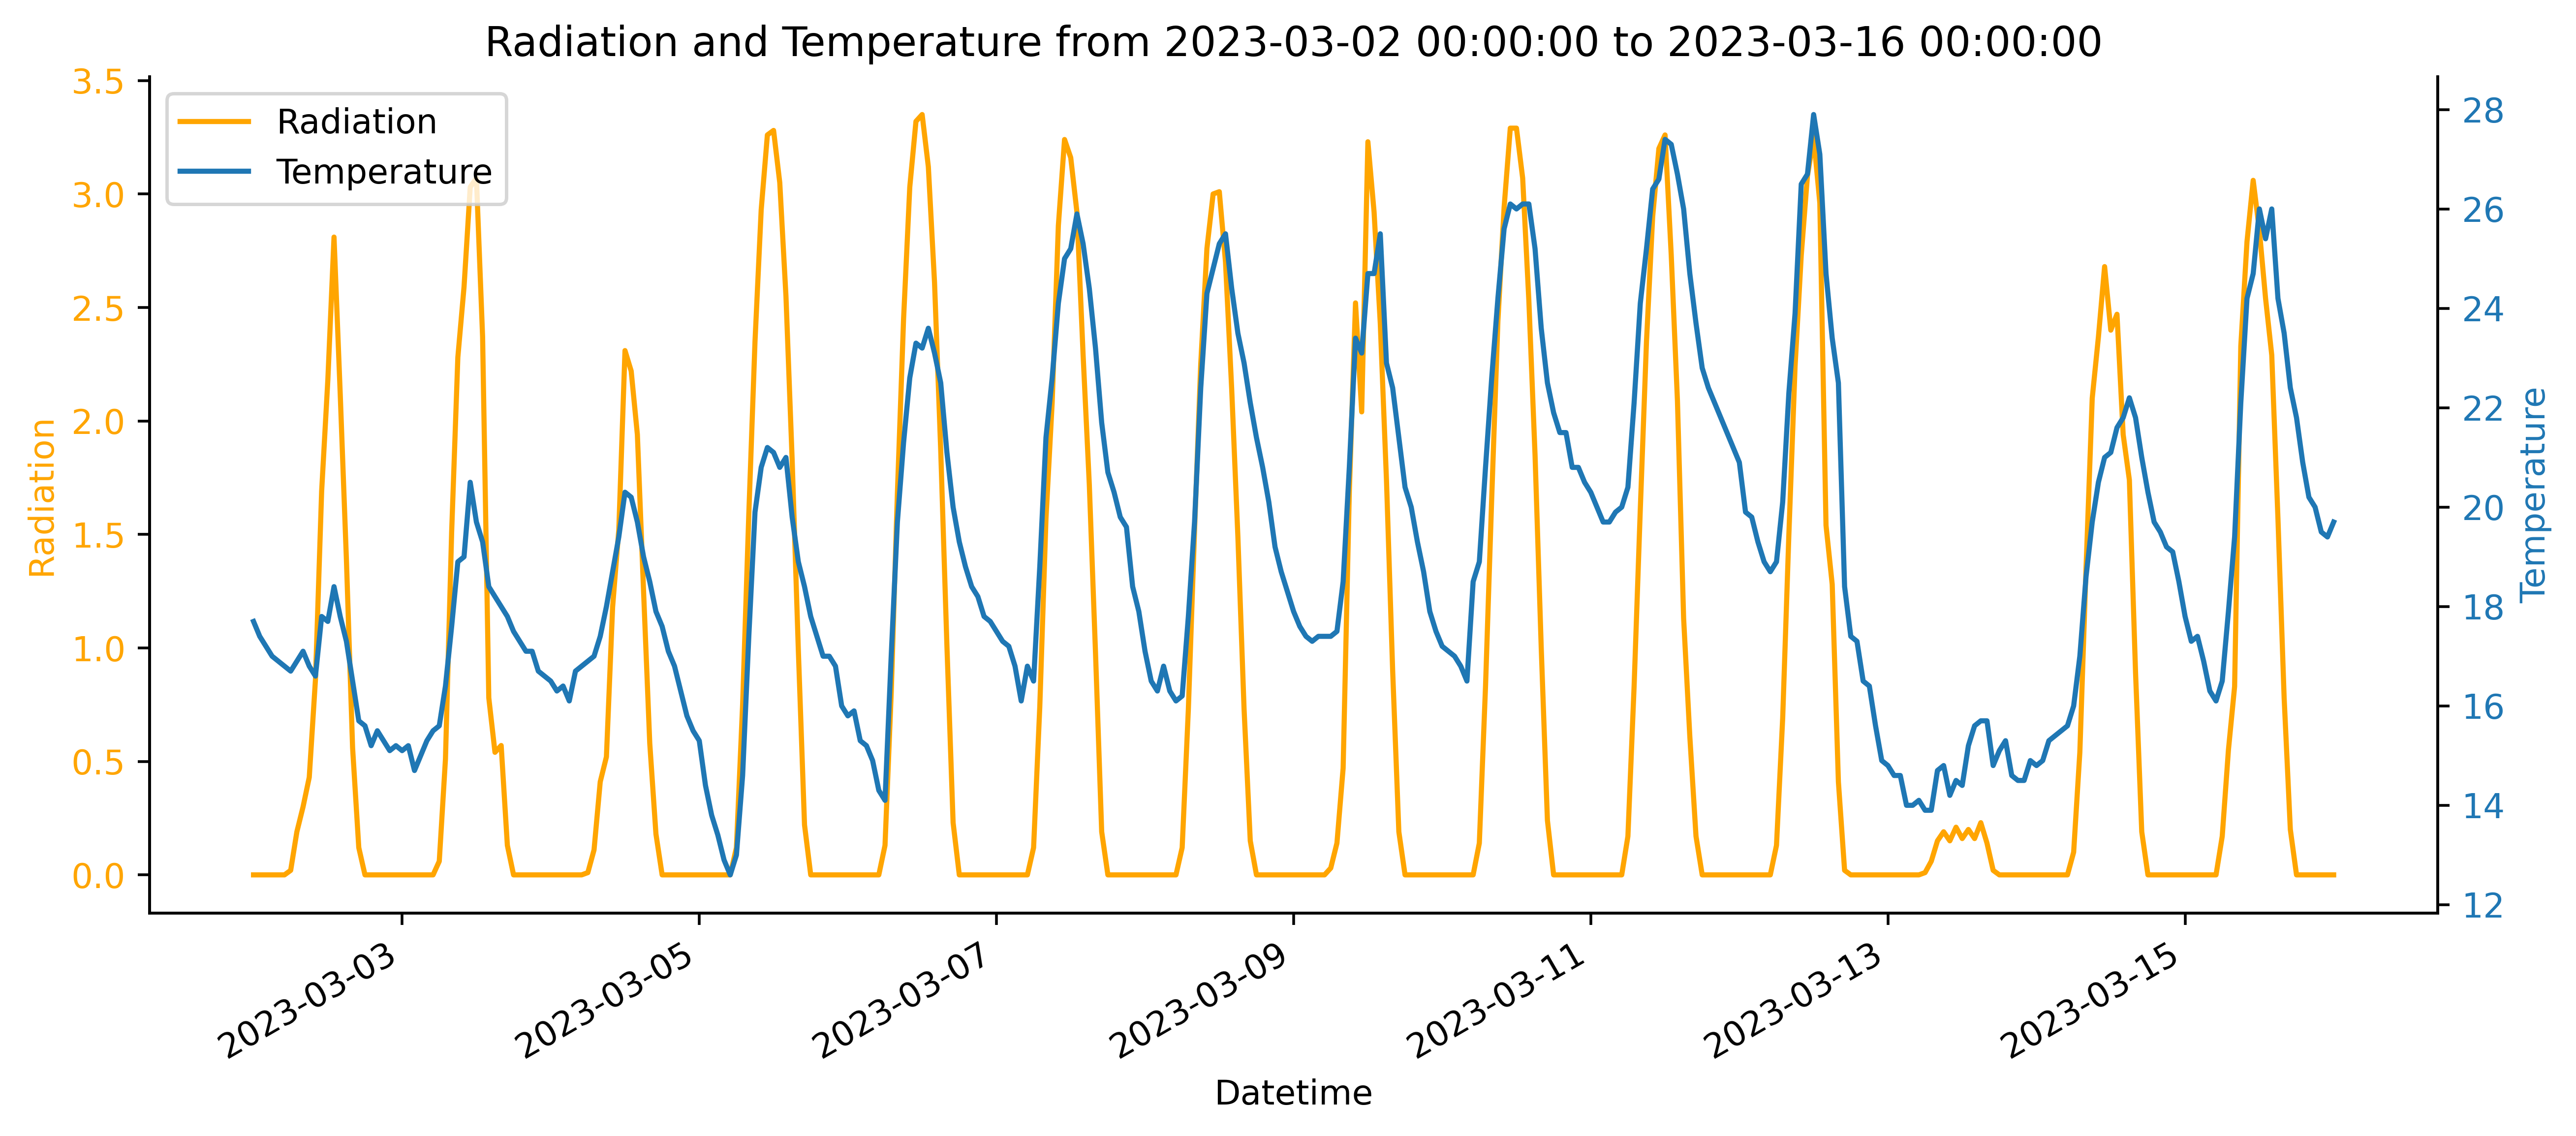

In [10]:
# ensure datetime index
r = radiation_data.copy().iloc[:, 0]
t = temperature_data.copy().iloc[:, 0]
r.index = pd.to_datetime(r.index)
t.index = pd.to_datetime(t.index)

# determine common range
start_min = pd.to_datetime(DataPreprocessor.start_date)
end_max = pd.to_datetime(DataPreprocessor.end_date)

# pick a random week start within the available range
max_start = end_max - pd.Timedelta(days=13)
if max_start <= start_min:
    week_start = start_min
else:
    # choose a random day offset
    days_range = (max_start - start_min).days
    offset_days = random.randint(0, days_range)
    week_start = start_min + pd.Timedelta(days=offset_days)

week_end = week_start + pd.Timedelta(days=14)  # 7-day window

r_week = r.loc[week_start:week_end]
t_week = t.loc[week_start:week_end]

# plotting
fig, ax1 = plt.subplots(figsize=(12, 5), dpi=500)
ax1.plot(r_week.index, r_week.values, color='orange', label='Radiation')
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Radiation', color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.plot(t_week.index, t_week.values, color='tab:blue', label='Temperature')
ax2.set_ylabel('Temperature', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2, loc='upper left')

fig.autofmt_xdate()
for a in (ax1, ax2):
    a.spines['top'].set_visible(False)

ax1.set_title(f'Radiation and Temperature from {week_start} to {week_end}')
plt.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)
plt.show()